# DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION #GRIP JAN21
#  

**Author: Roshan kumar G**

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [36]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from  sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels as sm
import warnings
warnings.filterwarnings('ignore')

In [37]:

data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Simple view at Data and its structure

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [39]:
data.describe(percentiles= [0.25,0.5,0.75,0.95,0.97,0.99]).T

,count,mean,std,min,25%,50%,75%,95%,97%,99%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,8.82,8.984,9.128,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,87.60,89.960,93.320,95.0


**No sign of outliers and missing values**

In [45]:
print("Skewness")
print(data.skew())
print("\nCorrelation\n")
data.corr()

Skewness
Hours     0.190338
Scores    0.233965
dtype: float64

Correlation



,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


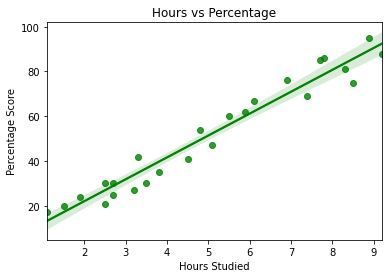

In [46]:

sns.regplot(data=data, x='Hours', y='Scores',  color = 'g')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

Text(0.5, 1.0, 'Density plot of Target(Score)')

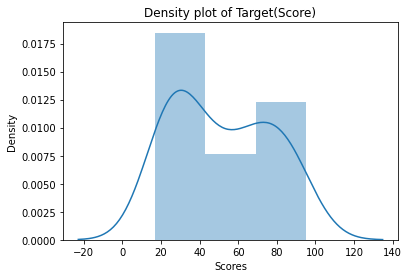

In [47]:
sns.distplot(data['Scores'])
plt.title("Density plot of Target(Score)")

**Just a view at the density of target variable**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [48]:
X = np.array(data['Hours']).reshape(-1,1)
y = np.array(data['Scores']).reshape(-1,1)

In [50]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [51]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('Scores ~ Hours', data=data).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           9.13e-17
Time:                        10:29:18   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

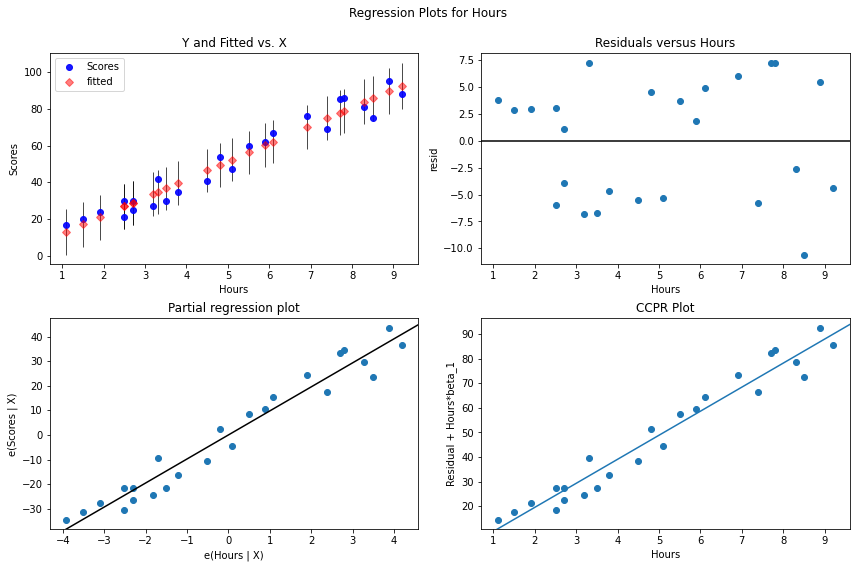

In [52]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'Hours', fig=fig)

# Training and Evaluation

In [53]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test)

print("Train R2_score ==> ",r2_score(y_train,reg.predict(X_train)))
print("Test R2_score ==> ",r2_score(y_test,y_pred))
print("MAE Train ==> ",mean_absolute_error(y_train,reg.predict(X_train)))
print("MAE Test ==> ",mean_absolute_error(y_test,y_pred))


Train R2_score ==>  0.9491209376364416
Test R2_score ==>  0.9678055545167994
MAE Train ==>  5.221357478352559
MAE Test ==>  3.9207511902099244


# Simple Cross validation

In [54]:
score = cross_val_score(reg,X,y,scoring= 'r2',cv=5)
score

array([0.78626426, 0.97891923, 0.93182467, 0.96604831, 0.9273292 ])

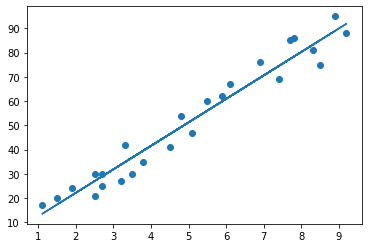

In [55]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [12]:
df = pd.DataFrame({'Actual': (y_test[:,0]), 'Predicted': (y_pred[:,0])})  
df


,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


# Prediction on Test Data

In [27]:

hours = 9.25 
hours = np.array(hours).reshape(-1,1)
new_pred = reg.predict(hours)
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = [9.25]
Predicted Score = [92.38611528]


### For the study hour 9.25, score could be around 92.38